<a href="https://colab.research.google.com/github/ashish78905/OPTICONNECT_CALLL_CENTER_ANALYSIS-ASSIGNMENT/blob/main/TILL_REGRESSION.IPYNB" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ========== 1. DATA LOADING ==========
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [ ]:
# Load diabetes dataset
diabetes = load_diabetes()
print(diabetes.DESCR)

In [ ]:
# Create DataFrame from diabetes dataset
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

In [ ]:
plt.scatter(data.bmi, data.target)
plt.xlabel("bmi")
plt.ylabel("target")
plt.show()

In [ ]:
# Define features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# ========== 3. TRAIN-TEST SPLIT ==========
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
# ========== 4. SCALING (STANDARDIZATION) ==========
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.scatter(X_train[:, 0], y_train)
plt.xlabel("Scaled Age")
plt.ylabel("Target")
plt.show()

In [ ]:
# ========== 5. MODEL TRAINING ==========
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

In [ ]:
# ========== 6. MODEL PREDICTION ==========
y_pred = model.predict(X_test)

# On training data
plt.scatter(X_train[:, 0], y_train)
plt.plot(X_train[:, 0], model.predict(X_train), 'r')
plt.xlabel("Scaled Age")
plt.ylabel("Target")
plt.show()

In [ ]:
# On testing data
y_pred_test = model.predict(X_test)
plt.scatter(X_test[:, 0], y_test)
plt.plot(X_test[:, 0], y_pred_test, 'r')
plt.xlabel("Scaled Age")
plt.ylabel("Target")
plt.show()

In [ ]:
# ========== 7. PERFORMANCE METRICS ==========
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

score = r2_score(y_test, y_pred_test)
print("R2 Score:", score)

adj_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2:", adj_r2)

In [ ]:
# ========== 8. VISUALIZATION ==========
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual data')
plt.plot(X_test[:, 0], y_pred_test, color='blue', linewidth=3, label="Linear regression line")
plt.xlabel("Scaled Age")
plt.ylabel("One year progression-target")
plt.title("Linear regression on diabetes data")
plt.legend()
plt.show()

In [ ]:
# ========== 9. MODEL ASSUMPTIONS & RESIDUALS ==========
# Residuals
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Residuals plot")
plt.show()

error = y_test - y_pred_test
print("Residual errors:\n", error)

# MULTIPLE LINEAR REGRESSSION

In [ ]:
# ========== 1. DATA LOADING ==========
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)
diabetes.data
diabetes.target
diabetes.feature_names
import pandas as pd
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data
data['target'] = diabetes.target

In [ ]:
# ========== 2. EDA & DATA PREPARATION ==========
import seaborn as sns

# Divide into X (features) and y (target)
# Define the independent features (X) by dropping the 'target' column
X = data.drop('target', axis = 1)
# Define the dependent feature (y) as the 'target' column
y = data['target']

# EDA on the data DataFrame
print("Data Info:")
data.info()
print("\nData Types:")
print(data.dtypes)
print("\nHead of Data:")
display(data.head())
print("\nTail of Data:")
display(data.tail())
print("\nSample of Data:")
display(data.sample(3))
print("\nMissing Values:")
print(data.isnull().sum())
print("\nData Description:")
display(data.describe())
print("\nCorrelation Matrix:")
display(data.corr())

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# ========== 3. TRAIN-TEST SPLIT ==========
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# ========== 4. SCALING ==========
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

In [ ]:
# ========== 5. MODEL TRAINING ==========
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
X_train.shape
len(model.coef_)
model.coef_
model.intercept_

In [ ]:
# ========== 6. MODEL PREDICTION ==========
y_pred = model.predict(X_test)

In [ ]:
# ========== 7. PERFORMANCE METRICS ==========
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

score = r2_score(y_test, y_pred)
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [ ]:
# ========== 8. MODEL ASSUMPTIONS & RESIDUALS ==========
plt.scatter(y_test, y_pred)

error = y_test - y_pred
sns.distplot(error)
plt.scatter(y_pred, error)

# PICKLING MODEL

In [ ]:
import pickle   # Importing pickle module for saving/loading Python objects

# Saving the trained model into a file named "model.pkl"
# pickle.dump(object, file, mode)
# object = model → the trained LinearRegression model
# open("model.pkl", "wb") → open file in write-binary mode to store bytes
pickle.dump(model, open("model.pkl", "wb"))  # write binary mode

# Explanation:
# Python object (here: model), along with its attributes (coefficients, intercept, etc.)
# and methods, is converted into a byte stream and saved into a file.
# Later, we can load this model back using pickle.load() without retraining.



# Loading the saved model from the file "model.pkl"

# pickle.load(file) → reads the byte stream and reconstructs the original Python object
# open("model.pkl", "rb") → open file in read-binary mode
model = pickle.load(open("model.pkl", 'rb'))

# Now 'model' is the same trained LinearRegression model we saved earlier.
# We can directly use it for predictions without retraining.



# Using the loaded model to make predictions on the test set

# model.predict(X_test) → applies the learned coefficients & intercept
# to the features in X_test and returns predicted values for target variable
y_pred = model.predict(X_test)

# Now y_pred contains the predictions made by the trained (or loaded) model


# polynomial Regression

In [ ]:
# ========== 1. DATA GENERATION ==========
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + 1.5*X**2 + np.random.randn(100, 1)
X
y

In [44]:
# ========== 2. TRAIN-TEST SPLIT ==========
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((80, 1), (20, 1))

In [45]:
# ========== 3. POLYNOMIAL TRANSFORMATION ==========
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

In [46]:
# ========== 4. MODEL TRAINING ==========
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
poly_reg.coef_
poly_reg.intercept_

array([4.49951103])

In [47]:
# ========== 5. MODEL PREDICTION ==========
y_poly_predict = poly_reg.predict(X_poly_train)

In [48]:
# ========== 6. PERFORMANCE EVALUATION ==========
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_poly_predict)
print(f'Mean Squared Error on Training Data: {mse_train}')

Mean Squared Error on Training Data: 0.8207003507057358


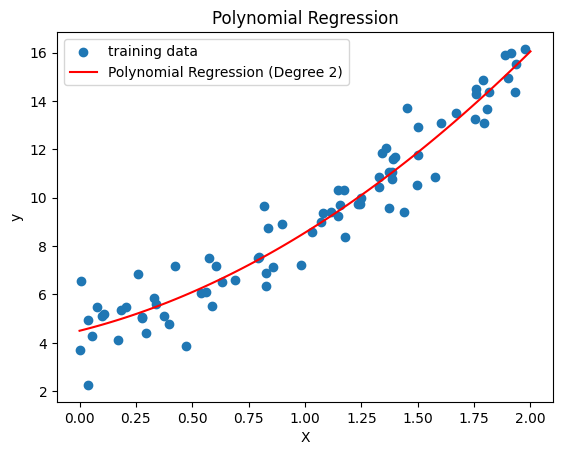

In [49]:
# ========== 7. VISUALIZATION ==========
plt.scatter(X_train, y_train, label="training data")
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
plt.plot(X_range, poly_reg.predict(X_range_poly), color='red',
         label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Multicollenearity

In [50]:
# ========== 1. LOADING DATASET ==========
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

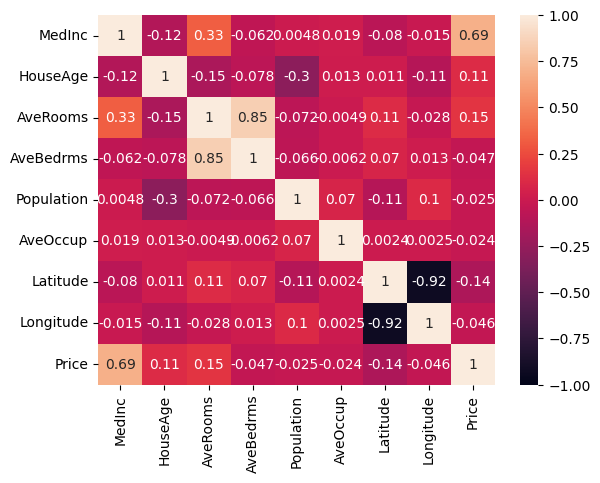

<Figure size 500x500 with 0 Axes>

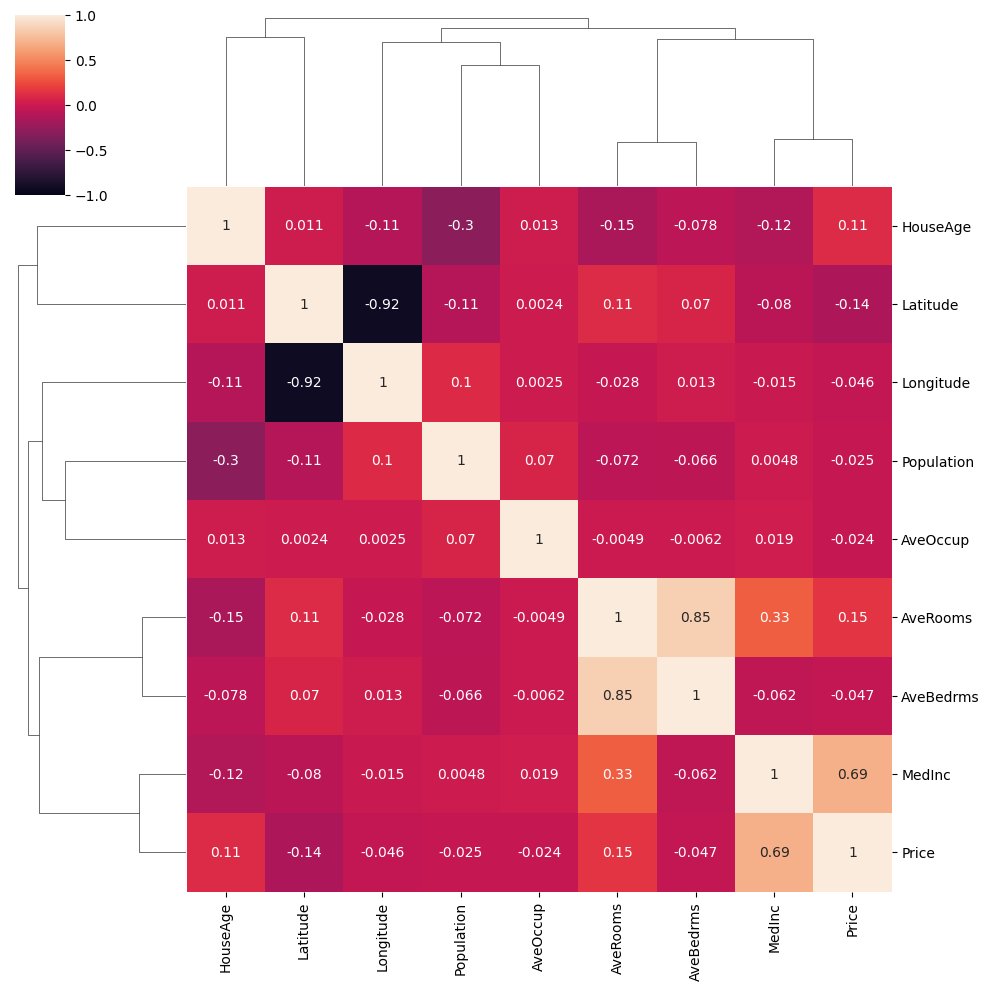

In [51]:
# ========== 2. MULTICOLLINEARITY ANALYSIS ==========
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.figure(figsize=(5, 5))
sns.clustermap(df.corr(), vmin=-1, vmax=1, annot=True)

In [52]:
# ========== 3. VARIANCE INFLATION FACTOR (VIF) ==========
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = df.copy()
df1.drop("Longitude", axis=1, inplace=True)

vif = pd.DataFrame()
vif["Feature"] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif


,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [53]:
df1.drop("AveRooms", axis=1, inplace=True)
vif = pd.DataFrame()
vif["Feature"] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [54]:
df1.drop("Latitude", axis=1, inplace=True)
vif = pd.DataFrame()
vif["Feature"] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


In [55]:
# ========== 4. FEATURE SELECTION (X & y) ==========
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [56]:
# ========== 5. RFE (RECURSIVE FEATURE ELIMINATION) ==========
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.columns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X.columns
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X, y)
rfe.predict(X)

print(rfe.support_)
print(rfe.ranking_)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

[ True False  True  True False False  True  True]
[1 2 1 1 4 3 1 1]
Selected Features: ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


# LASSO RIDGE AND ELASTIC NET EMPLIMENATION

In [57]:
# -------------------- LOAD DATASET --------------------
import seaborn as sns
df = sns.load_dataset('mpg')
df.head()
df.drop("name", axis = 1, inplace = True)
df.isna().sum()
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df.isna().sum()
df.info()
df.dtypes
df['origin'].value_counts()
df['origin'] = df['origin'].map({'usa': 1, "japan": 2, "europe": 3})
df['origin'] = df['origin'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [58]:
# -------------------- FEATURE & TARGET SPLIT --------------------
X = df.drop('mpg', axis=1)
y = df['mpg']
X
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [59]:
# -------------------- TRAIN TEST SPLIT --------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
X_train.shape, X_test.shape


((278, 7), (120, 7))

In [60]:
# -------------------- LINEAR REGRESSION --------------------
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[i]}")

from sklearn.metrics import r2_score
y_pred_linear = regression_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R square of linear regression {r2_linear}")

The coefficient for cylinders is -0.31761423027992997
The coefficient for displacement is 0.02623748259907894
The coefficient for horsepower is -0.018270764913124644
The coefficient for weight is -0.007487750398361904
The coefficient for acceleration is 0.050406734619713886
The coefficient for model_year is 0.8470951427061371
The coefficient for origin is 1.5190958387975042
R square of linear regression 0.8348001123742284


In [61]:
# -------------------- RIDGE REGRESSION --------------------
from sklearn.linear_model import Ridge
ridge_regression_model = Ridge(alpha = 0.1)
ridge_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {ridge_regression_model.coef_[i]}")
y_pred_ridge = ridge_regression_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R-squared score for Ridge Regression: {r2_ridge}")

The coefficient for cylinders is -0.31700321010067906
The coefficient for displacement is 0.02621324975798342
The coefficient for horsepower is -0.018263252481449534
The coefficient for weight is -0.00748732605021309
The coefficient for acceleration is 0.050368969474425776
The coefficient for model_year is 0.8470062938903167
The coefficient for origin is 1.5174528285653937
R-squared score for Ridge Regression: 0.8348084889168355


In [62]:
# -------------------- LASSO REGRESSION --------------------
from sklearn.linear_model import Lasso
lasso_regression_model = Lasso(alpha = 0.5)
lasso_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {lasso_regression_model.coef_[i]}")
y_pred_lasso = lasso_regression_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R-squared score for Lasso Regression: {r2_lasso}")

The coefficient for cylinders is -0.0
The coefficient for displacement is 0.006208198888300358
The coefficient for horsepower is -0.011058382987169565
The coefficient for weight is -0.0069826731680230885
The coefficient for acceleration is 0.0
The coefficient for model_year is 0.744654952003819
The coefficient for origin is 0.0
R-squared score for Lasso Regression: 0.8277934716635555


In [63]:
# -------------------- ELASTIC NET REGRESSION --------------------
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {elastic_net_model.coef_[i]}")
y_pred_elastic_net = elastic_net_model.predict(X_test)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print(f"R-squared score for Elastic Net Regression: {r2_elastic_net}")

The coefficient for cylinders is -0.0
The coefficient for displacement is 0.005888869953667563
The coefficient for horsepower is -0.012403874933570126
The coefficient for weight is -0.006934550516257631
The coefficient for acceleration is 0.0
The coefficient for model_year is 0.7133150744603874
The coefficient for origin is 0.0
R-squared score for Elastic Net Regression: 0.8284840073256804


In [64]:
# -------------------- LASSO WITH CROSS VALIDATION --------------------
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train, y_train)
y_pred_lassocv = lassocv.predict(X_test)
score_lassocv = r2_score(y_test, y_pred_lassocv)
print("Best alpha chosen by LassoCV:", lassocv.alpha_)
print("R2 Score (LassoCV):", score_lassocv)

Best alpha chosen by LassoCV: 5.460936201542364
R2 Score (LassoCV): 0.8082805983844751


In [65]:
# -------------------- RIDGE WITH CROSS VALIDATION --------------------
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)
y_pred_ridgecv = ridgecv.predict(X_test)
score_ridgecv = r2_score(y_test, y_pred_ridgecv)
print("Best alpha chosen by RidgeCV:", ridgecv.alpha_)
print("R2 Score (RidgeCV):", score_ridgecv)
print("RidgeCV Parameters:", ridgecv.get_params())

Best alpha chosen by RidgeCV: 10.0
R2 Score (RidgeCV): 0.8354145247502054
RidgeCV Parameters: {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_results': None, 'store_cv_values': 'deprecated'}
